__Plot NEXD-2D seismograms__

Daniel Köhn 
Kiel, 27/02/2018

__Import Libraries__

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from matplotlib.colors import LightSource, Normalize
from matplotlib.pyplot import gca
from pylab import rcParams
from matplotlib import rc
from matplotlib.ticker import FormatStrFormatter

__Define fonts__

In [2]:
FSize = 20
font = {'color':  'black',
        'weight': 'normal',
        'size': FSize}
mpl.rc('xtick', labelsize=FSize) 
mpl.rc('ytick', labelsize=FSize) 
rcParams['figure.figsize'] = 16, 12

__Read seismograms (SPECFEM-2D)__

In [3]:
basename_sem = "ref/"
state = "AA"

In [4]:
# define file names for all components
name_seis_1_x = basename_sem + "S0001." + state + ".BXX.semd"
name_seis_1_z = basename_sem + "S0001." + state + ".BXZ.semd"

In [5]:
# read 2-component data
data_sem_1_x = np.genfromtxt(name_seis_1_x, dtype=None)
data_sem_1_z = np.genfromtxt(name_seis_1_z, dtype=None)

In [6]:
# define time vector [s]
tsem = data_sem_1_x[:,0]

__Read seismograms (analytical solution)__

In [7]:
basename_analy = "ref/"

In [8]:
# define file names for all components
name_seis_1_x = basename_analy + "Ux_file_ascii_rec1"
name_seis_1_z = basename_analy + "Uz_file_ascii_rec1"

In [9]:
# read 2-component data
data_analy_1_x = np.genfromtxt(name_seis_1_x, dtype=None)
data_analy_1_z = np.genfromtxt(name_seis_1_z, dtype=None)

In [10]:
# define time vector [s]
tanaly = data_analy_1_x[:,0]

__Read seismograms (NEXD-2D)__

In [11]:
basename_nexd = "out/seismo"

In [12]:
# define file names for all components
name_seis_1_x = basename_nexd + ".x.0000001" + ".sdu"
name_seis_1_z = basename_nexd + ".z.0000001" + ".sdu"

In [13]:
# read 2-component data
data_nexd_1_x = np.genfromtxt(name_seis_1_x, dtype=None)
data_nexd_1_z = np.genfromtxt(name_seis_1_z, dtype=None)

In [14]:
# define time vector [s]
tnexd = data_nexd_1_x[:,0]

__Define SubPlot__

In [15]:
def do_plot(n, seis_sem, seis_nexd, seis_analy, an, title):
    
    ax=plt.subplot(2, 1, n)    
    
    rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
    rc('text', usetex=True)
    
    plt.plot(tsem,seis_sem[:,1])
    plt.plot(tnexd,seis_nexd[:,1])
    plt.plot(tanaly,seis_analy[:,1])
        
    # legend
    plt.legend(('SPECFEM-2D', 'NEXD-2D (no PML)', 'analytical'), shadow=True, fontsize=FSize)
    
    a = gca()
    a.set_xticklabels(a.get_xticks(), font)
    a.set_yticklabels(a.get_yticks(), font)
    plt.axis('tight')
    plt.title(title, fontdict=font)
    plt.ylabel(an, fontdict=font)
    if n!=2:
        ax.set_xticks([])
    if n==2:
        plt.xlabel('Time [s]', fontdict=font)
    plt.tight_layout()

__Plot SubPlots__

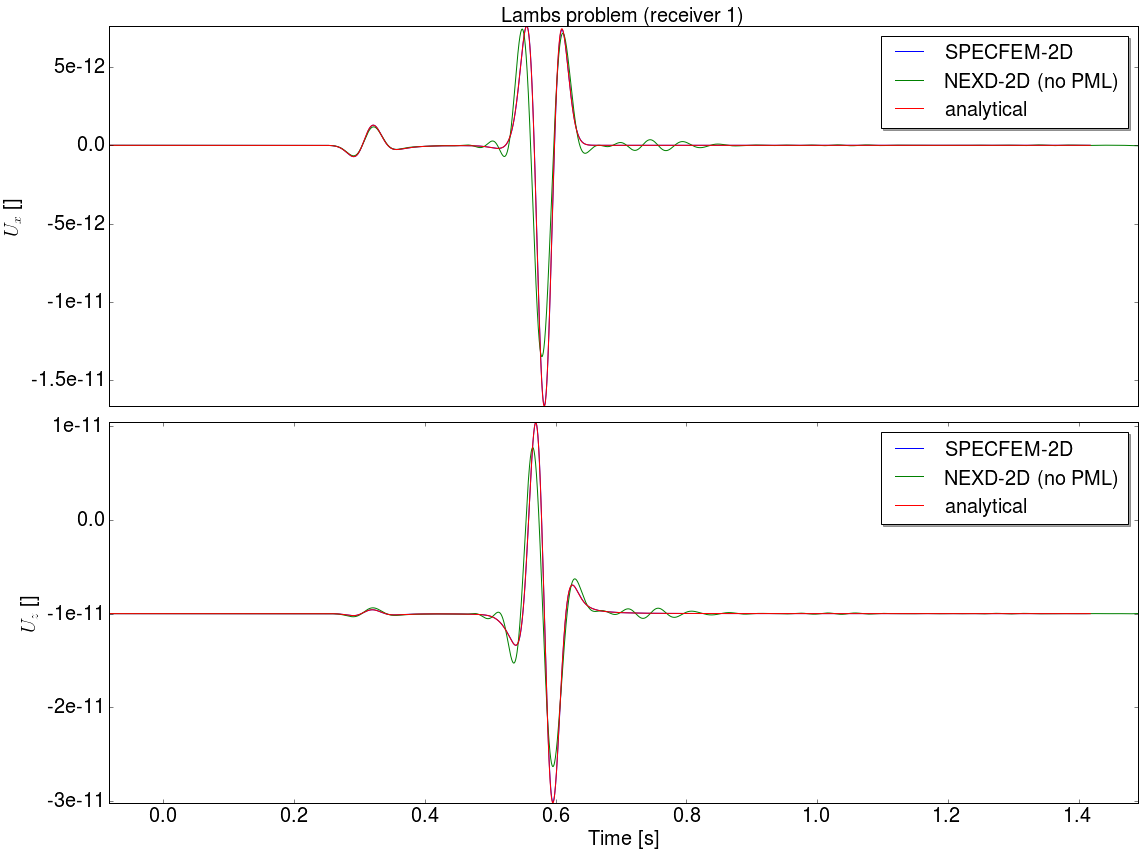

In [16]:
plt.close('all')
plt.figure()
do_plot(1, data_sem_1_x, data_nexd_1_x, data_analy_1_x, '$U_x$ []', "Lambs problem (receiver 1)")
do_plot(2, data_sem_1_z, data_nexd_1_z, data_analy_1_z, '$U_z$ []', "")
filename = "lambs_problem_receiver_1_u.pdf"
plt.savefig(filename, bbox_inches='tight', format='pdf')
#plt.savefig(filename, bbox_inches='tight', format='png', dpi=200)
plt.show()